# Unstructured & Qualitative example
## How do people on X feel about ChatGPT?

https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/


### Set Up

In [3]:
import micropip
await micropip.install("textblob")

In [5]:
from textblob import TextBlob

from textblob import TextBlob
# Ish via https://til.simonwillison.net/python/sqlite-in-pyodide
from js import fetch
 
async def load_file_into_in_mem_filesystem(url, fn=None):
    """Load a file from a URL into an in-memory filesystem."""
     
    # Create a filename if required
    fn = fn if fn is not None else url.split("/")[-1]
     
    # Fetch file from URL
    res = await fetch(url)
     
    # Buffer it
    buffer = await res.arrayBuffer()
     
    # Write file to in-memory file system
    open(fn, "wb").write(bytes(buffer.valueOf().to_py()))
 
    return fn

## Download 1000 tweets

In [8]:
url="https://raw.githubusercontent.com/UTCSheffield/OCR-Unit-7-Data-analysis-and-design/main/content/data/chatgpt_tweets_short.csv"
 
tweets_file = await load_file_into_in_mem_filesystem(url)

In [27]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

df = pd.read_csv(tweets_file)

df.head() # Print the first few to see what it looks like

,tweets
0,"Interestingly, we didn't write this to coincide with the release of chatGPT...we just have really good timing 😀 https://t.co/v6JfVlbICO"
1,The first time I used chatGPT and it lied to me lol callback is not a param for put_object https://t.co/i1qMbW0nZC
2,"ChatGPT is mind blowing, and this is just the beginning. https://t.co/1pUIrcpnrY"
3,I think that #OpenAI kind of killed lots of industries overnight. There are though times ahead of us. Here is the latest example of fully functional landing page website automatically created by ChatGPT.\nhttps://t.co/RqOUVdP2HC
4,"watching this chatGPT stuff like, you know i'm not gonna read any of that but congrats or i'm sorry and also i'm doing hardware now so uh, i'm ahead of you in line for that."


### Polarity and Subjectivity 

One of the common ways to measure sentiment is by using polarity and subjectivity scores. 

Polarity refers to how positive or negative a text is, while subjectivity refers to how opinionated or factual a text is.

We can use TextBlob to analyse the polarity and subjectivity

In [14]:


df['sentiment_polarity'] = df['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df['sentiment_subjectivity'] = df['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)


df

,tweets,sentiment_polarity,sentiment_subjectivity
0,"Interestingly, we didn't write this to coincid...",0.600000,0.550000
1,The first time I used chatGPT and it lied to m...,0.525000,0.516667
2,"ChatGPT is mind blowing, and this is just the ...",0.000000,0.000000
3,I think that #OpenAI kind of killed lots of in...,0.300000,0.600000
4,"watching this chatGPT stuff like, you know i'm...",-0.500000,1.000000
...,...,...,...
9995,"OK, ChatGPT is really fun. Will share some stu...",0.266667,0.233333
9996,ChatGPT seems to be great at finding grammar m...,0.900000,0.875000
9997,ChatGPT poem about threadbois.\nLmao 🤣 https:/...,0.000000,0.000000
9998,When I get that interesting response from #cha...,0.500000,0.500000


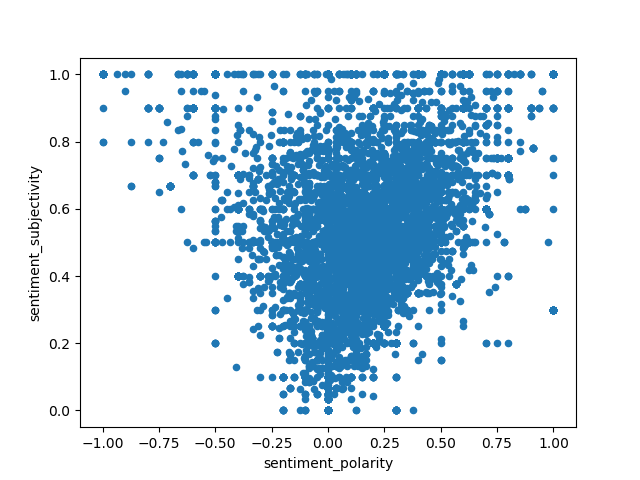

In [ ]:
import matplotlib.pyplot as plt

scatter = df.plot.scatter(x = 'sentiment_polarity', y = 'sentiment_subjectivity')
plt.show()